In [157]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import tensorflow_hub as hub
import numpy as np
import tensorflow_text
import datetime as dt
import datetime
from datetime import datetime

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.model_selection import train_test_split,cross_validate
import joblib
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler



from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector
# import models
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('bitcoin_ticker.csv')

In [4]:
df.rename({'Unnamed: 0':'Date'}, inplace=True, axis=1)
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index(['Date'])
df = df.drop(['is_intc','is_ge','is_bynd','BTC','is_btc'], axis = 1)


In [5]:
binance_df = pd.read_csv('Binance_BTCUSDT_d.csv')
binance_df = binance_df[['date','close']]
binance_df['date'] = pd.to_datetime(binance_df['date'])
binance_df = binance_df.set_index(['date'])

In [3]:
def onezero(x):
    if x>0:
        return 1
    else:
        return 0

In [6]:
btc_target = pd.Series(binance_df['close']).diff().apply(onezero)
btc_df = pd.merge(df,btc_target,left_index=True,right_index=True,)

In [8]:
btc_df

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,close
2018-01-05,-0.013117,0.050249,-0.089505,-0.092741,0.037357,0.060436,-0.054213,0.004616,-0.025182,-0.005532,...,-0.088402,0.013783,-0.087747,0.015506,0.063639,0.031106,-0.038073,0.058685,-0.026750,0
2018-01-08,-0.014055,-0.008568,-0.035180,-0.050764,0.018540,0.049535,0.019374,0.006960,-0.048838,0.004369,...,0.020352,0.029425,-0.034056,0.040794,-0.018060,0.006818,-0.007444,0.003750,0.026947,1
2018-01-10,-0.020160,0.077612,-0.086937,-0.087630,0.051575,0.015803,-0.020839,0.047803,0.033464,0.061327,...,-0.069036,0.006249,-0.089332,0.048672,0.017545,0.049167,-0.024719,0.026676,-0.024144,1
2018-01-11,-0.049693,-0.034059,-0.011563,0.023274,0.041552,-0.053513,0.087067,0.029606,-0.024782,-0.049679,...,0.018620,-0.016023,0.006528,0.039616,-0.032307,0.013691,-0.089713,0.017997,-0.059676,0
2018-01-12,0.013330,0.027462,-0.094327,-0.063976,0.008876,-0.031593,-0.038821,0.039568,0.045371,-0.015747,...,-0.044575,-0.032921,-0.101876,0.070673,0.043715,-0.041792,-0.050335,-0.008948,0.033937,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-26,-0.001720,0.016274,-0.065167,-0.058923,-0.002287,0.007711,-0.014827,0.036962,-0.006803,0.024787,...,-0.051016,0.005601,-0.063204,0.051792,0.033882,0.005262,-0.039788,0.018364,0.028023,0
2021-07-27,-0.040802,-0.034456,-0.008718,-0.039767,0.068099,0.004389,0.064929,0.032037,0.053845,-0.023774,...,-0.051587,-0.057731,-0.015623,0.078866,0.025335,0.051901,-0.057740,-0.022931,0.061395,0
2021-07-28,-0.008338,0.009048,-0.065037,-0.042550,0.015016,-0.015267,0.013546,0.037848,-0.015830,0.019980,...,-0.052015,-0.000688,-0.062559,0.057076,0.017995,0.016437,-0.066338,0.017857,0.033141,1
2021-07-29,-0.026184,0.016183,-0.068015,-0.057039,0.005724,0.030354,0.058527,-0.012193,-0.020392,0.030590,...,-0.052780,0.022534,-0.045359,0.054422,0.041829,-0.023707,-0.038047,0.021094,0.052705,0


In [10]:
X = btc_df.drop(columns = ['close'], axis = 1)
y = btc_df['close']

<h2>The voting classifier has two basic hyperparameters: estimators and voting </h2> <br>
<p> If set to hard, the voting classifier will make judgments based on the predictions that appear the most. Otherwise, if set to soft, it will use a weighted approach to make its decision. </p>

In [113]:
# Instantiating basic models
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
knn_clf = KNeighborsClassifier()

In [114]:
# applying each model to our Voting Classifier
vot_clf = VotingClassifier(estimators = 
                           [('lr', log_clf), 
                            ('rnd', rnd_clf), 
                            ('knn', knn_clf)], 
                           voting = 'hard')

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

In [105]:
vot_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rnd', RandomForestClassifier()),
                             ('knn', KNeighborsClassifier())])

In [189]:
vot_clf_score = vot_clf.score(X_test, y_test)

NotFittedError: This VotingClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [92]:
for clf in (log_clf, rnd_clf, knn_clf, vot_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.45454545454545453
RandomForestClassifier 0.4462809917355372
KNeighborsClassifier 0.5206611570247934
VotingClassifier 0.4214876033057851


In [200]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(vot_clf.get_params())

Parameters currently in use:

{'estimators': [('lr', LogisticRegression()),
                ('rnd', RandomForestClassifier()),
                ('knn', KNeighborsClassifier())],
 'flatten_transform': True,
 'knn': KNeighborsClassifier(),
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 5,
 'knn__p': 2,
 'knn__weights': 'uniform',
 'lr': LogisticRegression(),
 'lr__C': 1.0,
 'lr__class_weight': None,
 'lr__dual': False,
 'lr__fit_intercept': True,
 'lr__intercept_scaling': 1,
 'lr__l1_ratio': None,
 'lr__max_iter': 100,
 'lr__multi_class': 'auto',
 'lr__n_jobs': None,
 'lr__penalty': 'l2',
 'lr__random_state': None,
 'lr__solver': 'lbfgs',
 'lr__tol': 0.0001,
 'lr__verbose': 0,
 'lr__warm_start': False,
 'n_jobs': None,
 'rnd': RandomForestClassifier(),
 'rnd__bootstrap': True,
 'rnd__ccp_alpha': 0.0,
 'rnd__class_weight': None,
 'rnd__criterion': 'gini',
 'rnd__max_depth': None,
 'rnd__

In [117]:
"""hyperparameters for Random Forest"""
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'rnd__n_estimators': n_estimators,
               'rnd__max_features': max_features,
               'rnd__max_depth': max_depth,
               'rnd__min_samples_split': min_samples_split,
               'rnd__min_samples_leaf': min_samples_leaf,
               'rnd__bootstrap': bootstrap,
               'knn_'}
pprint(random_grid)

{'rnd__bootstrap': [True, False],
 'rnd__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'rnd__max_features': ['auto', 'sqrt'],
 'rnd__min_samples_leaf': [1, 2, 4],
 'rnd__min_samples_split': [2, 5, 10],
 'rnd__n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [118]:
# rf_random = GridSearchCV(estimator = vot_clf, param_grid=random_grid, cv = 5, verbose=2, n_jobs = -1)
rf_random = RandomizedSearchCV(estimator = vot_clf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)



In [119]:
# examine paramters that have been entered for random forest
pprint(rf_random.get_params())

{'cv': 3,
 'error_score': nan,
 'estimator': VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rnd', RandomForestClassifier()),
                             ('knn', KNeighborsClassifier())]),
 'estimator__estimators': [('lr', LogisticRegression()),
                           ('rnd', RandomForestClassifier()),
                           ('knn', KNeighborsClassifier())],
 'estimator__flatten_transform': True,
 'estimator__knn': KNeighborsClassifier(),
 'estimator__knn__algorithm': 'auto',
 'estimator__knn__leaf_size': 30,
 'estimator__knn__metric': 'minkowski',
 'estimator__knn__metric_params': None,
 'estimator__knn__n_jobs': None,
 'estimator__knn__n_neighbors': 5,
 'estimator__knn__p': 2,
 'estimator__knn__weights': 'uniform',
 'estimator__lr': LogisticRegression(),
 'estimator__lr__C': 1.0,
 'estimator__lr__class_weight': None,
 'estimator__lr__dual': False,
 'estimator__lr__fit_intercept': True,
 'estimator__lr__intercept_scaling': 1,
 'estima

In [121]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=VotingClassifier(estimators=[('lr',
                                                           LogisticRegression()),
                                                          ('rnd',
                                                           RandomForestClassifier()),
                                                          ('knn',
                                                           KNeighborsClassifier())]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'rnd__bootstrap': [True, False],
                                        'rnd__max_depth': [10, 20, 30, 40, 50,
                                                           60, 70, 80, 90, 100,
                                                           110, None],
                                        'rnd__max_features': ['auto', 'sqrt'],
                                        'rnd__min_samples_leaf': [1, 2, 4],
                        

In [99]:
# rf_cv_results = cross_validate(vot_clf, X, y, cv=4, 
#                             scoring=['accuracy']) 

In [125]:
# rf_cv_results['test_accuracy'].mean()

In [197]:
rf_random.best_params_

{'rnd__n_estimators': 800,
 'rnd__min_samples_split': 2,
 'rnd__min_samples_leaf': 2,
 'rnd__max_features': 'sqrt',
 'rnd__max_depth': 50,
 'rnd__bootstrap': False}

In [198]:
rf_best = rf_random.best_estimator_
rf_best

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rnd',
                              RandomForestClassifier(bootstrap=False,
                                                     max_depth=50,
                                                     max_features='sqrt',
                                                     min_samples_leaf=2,
                                                     n_estimators=800)),
                             ('knn', KNeighborsClassifier())])

In [199]:
rf_random.best_score_

0.5833333333333334

In [127]:
# hyperparamter models (focusing on Random Forest initailly)
# rf_best --> this is our best model with best hyperparamters for RND

In [135]:
# rf_best.score(X_test, y_test)
# rf_best_cross = cross_validate(rf_random, X, y, cv=5, 
#                             scoring=['accuracy']) 

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END rnd__bootstrap=True, rnd__max_depth=30, rnd__max_features=sqrt, rnd__min_samples_leaf=1, rnd__min_samples_split=5, rnd__n_estimators=400; total time=   4.0s
[CV] END rnd__bootstrap=True, rnd__max_depth=10, rnd__max_features=sqrt, rnd__min_samples_leaf=1, rnd__min_samples_split=5, rnd__n_estimators=2000; total time=  38.0s
[CV] END rnd__bootstrap=False, rnd__max_depth=30, rnd__max_features=auto, rnd__min_samples_leaf=4, rnd__min_samples_split=2, rnd__n_estimators=2000; total time=  25.4s
[CV] END rnd__bootstrap=True, rnd__max_depth=10, rnd__max_features=sqrt, rnd__min_samples_leaf=4, rnd__min_samples_split=2, rnd__n_estimators=1600; total time=  17.5s
[CV] END rnd__bootstrap=False, rnd__max_depth=100, rnd__max_features=sqrt, rnd__min_samples_leaf=2, rnd__min_samples_split=5, rnd__n_estimators=1000; total time=  15.9s
[CV] END rnd__bootstrap=False, rnd__m

[CV] END rnd__bootstrap=True, rnd__max_depth=10, rnd__max_features=sqrt, rnd__min_samples_leaf=4, rnd__min_samples_split=2, rnd__n_estimators=400; total time=   6.9s[CV] END rnd__bootstrap=True, rnd__max_depth=10, rnd__max_features=sqrt, rnd__min_samples_leaf=1, rnd__min_samples_split=5, rnd__n_estimators=2000; total time=  37.7s
[CV] END rnd__bootstrap=False, rnd__max_depth=10, rnd__max_features=sqrt, rnd__min_samples_leaf=2, rnd__min_samples_split=5, rnd__n_estimators=1200; total time=  16.5s
[CV] END rnd__bootstrap=False, rnd__max_depth=30, rnd__max_features=auto, rnd__min_samples_leaf=4, rnd__min_samples_split=2, rnd__n_estimators=2000; total time=  26.0s
[CV] END rnd__bootstrap=False, rnd__max_depth=30, rnd__max_features=sqrt, rnd__min_samples_leaf=4, rnd__min_samples_split=5, rnd__n_estimators=800; total time=  12.1s
[CV] END rnd__bootstrap=False, rnd__max_depth=100, rnd__max_features=sqrt, rnd__min_samples_leaf=2, rnd__min_samples_split=5, rnd__n_estimators=1000; total time=  19

[CV] END rnd__bootstrap=False, rnd__max_depth=10, rnd__max_features=auto, rnd__min_samples_leaf=4, rnd__min_samples_split=2, rnd__n_estimators=1800; total time=  27.9s[CV] END rnd__bootstrap=True, rnd__max_depth=30, rnd__max_features=sqrt, rnd__min_samples_leaf=1, rnd__min_samples_split=5, rnd__n_estimators=400; total time=   4.1s
[CV] END rnd__bootstrap=True, rnd__max_depth=10, rnd__max_features=sqrt, rnd__min_samples_leaf=1, rnd__min_samples_split=5, rnd__n_estimators=2000; total time=  38.3s
[CV] END rnd__bootstrap=False, rnd__max_depth=30, rnd__max_features=auto, rnd__min_samples_leaf=4, rnd__min_samples_split=2, rnd__n_estimators=2000; total time=  25.8s
[CV] END rnd__bootstrap=True, rnd__max_depth=10, rnd__max_features=sqrt, rnd__min_samples_leaf=4, rnd__min_samples_split=2, rnd__n_estimators=1600; total time=  17.7s
[CV] END rnd__bootstrap=False, rnd__max_depth=100, rnd__max_features=sqrt, rnd__min_samples_leaf=2, rnd__min_samples_split=5, rnd__n_estimators=1000; total time=  17

[CV] END rnd__bootstrap=True, rnd__max_depth=20, rnd__max_features=sqrt, rnd__min_samples_leaf=1, rnd__min_samples_split=10, rnd__n_estimators=1600; total time=  22.3s[CV] END rnd__bootstrap=True, rnd__max_depth=30, rnd__max_features=sqrt, rnd__min_samples_leaf=1, rnd__min_samples_split=5, rnd__n_estimators=400; total time=   4.3s
[CV] END rnd__bootstrap=False, rnd__max_depth=10, rnd__max_features=sqrt, rnd__min_samples_leaf=2, rnd__min_samples_split=5, rnd__n_estimators=1200; total time=  32.3s
[CV] END rnd__bootstrap=False, rnd__max_depth=10, rnd__max_features=sqrt, rnd__min_samples_leaf=2, rnd__min_samples_split=5, rnd__n_estimators=1200; total time=  16.6s
[CV] END rnd__bootstrap=True, rnd__max_depth=10, rnd__max_features=sqrt, rnd__min_samples_leaf=4, rnd__min_samples_split=2, rnd__n_estimators=1600; total time=  16.2s
[CV] END rnd__bootstrap=False, rnd__max_depth=30, rnd__max_features=sqrt, rnd__min_samples_leaf=4, rnd__min_samples_split=5, rnd__n_estimators=800; total time=  10.

[CV] END rnd__bootstrap=True, rnd__max_depth=None, rnd__max_features=auto, rnd__min_samples_leaf=2, rnd__min_samples_split=10, rnd__n_estimators=1600; total time=  25.8s
[CV] END rnd__bootstrap=False, rnd__max_depth=80, rnd__max_features=sqrt, rnd__min_samples_leaf=1, rnd__min_samples_split=10, rnd__n_estimators=1000; total time=  15.7s
[CV] END rnd__bootstrap=False, rnd__max_depth=60, rnd__max_features=auto, rnd__min_samples_leaf=2, rnd__min_samples_split=10, rnd__n_estimators=2000; total time=  28.6s
[CV] END rnd__bootstrap=False, rnd__max_depth=80, rnd__max_features=sqrt, rnd__min_samples_leaf=4, rnd__min_samples_split=2, rnd__n_estimators=1400; total time=  23.1s
[CV] END rnd__bootstrap=True, rnd__max_depth=60, rnd__max_features=sqrt, rnd__min_samples_leaf=2, rnd__min_samples_split=5, rnd__n_estimators=1800; total time=  37.8s
[CV] END rnd__bootstrap=True, rnd__max_depth=90, rnd__max_features=auto, rnd__min_samples_leaf=1, rnd__min_samples_split=5, rnd__n_estimators=1600; total tim

[CV] END rnd__bootstrap=False, rnd__max_depth=40, rnd__max_features=auto, rnd__min_samples_leaf=1, rnd__min_samples_split=2, rnd__n_estimators=1400; total time=  14.5s
[CV] END rnd__bootstrap=False, rnd__max_depth=None, rnd__max_features=auto, rnd__min_samples_leaf=2, rnd__min_samples_split=10, rnd__n_estimators=1200; total time=  17.9s
[CV] END rnd__bootstrap=True, rnd__max_depth=20, rnd__max_features=sqrt, rnd__min_samples_leaf=1, rnd__min_samples_split=10, rnd__n_estimators=1600; total time=  19.3s
[CV] END rnd__bootstrap=True, rnd__max_depth=None, rnd__max_features=auto, rnd__min_samples_leaf=2, rnd__min_samples_split=10, rnd__n_estimators=1600; total time=  26.0s
[CV] END rnd__bootstrap=True, rnd__max_depth=70, rnd__max_features=auto, rnd__min_samples_leaf=2, rnd__min_samples_split=2, rnd__n_estimators=1400; total time=  16.2s
[CV] END rnd__bootstrap=True, rnd__max_depth=70, rnd__max_features=auto, rnd__min_samples_leaf=2, rnd__min_samples_split=2, rnd__n_estimators=1400; total ti

[CV] END rnd__bootstrap=True, rnd__max_depth=80, rnd__max_features=sqrt, rnd__min_samples_leaf=4, rnd__min_samples_split=5, rnd__n_estimators=1400; total time=  20.6s
[CV] END rnd__bootstrap=False, rnd__max_depth=10, rnd__max_features=auto, rnd__min_samples_leaf=4, rnd__min_samples_split=2, rnd__n_estimators=1800; total time=  26.7s
[CV] END rnd__bootstrap=False, rnd__max_depth=80, rnd__max_features=sqrt, rnd__min_samples_leaf=1, rnd__min_samples_split=10, rnd__n_estimators=1000; total time=  15.7s
[CV] END rnd__bootstrap=False, rnd__max_depth=60, rnd__max_features=auto, rnd__min_samples_leaf=2, rnd__min_samples_split=10, rnd__n_estimators=2000; total time=  28.7s
[CV] END rnd__bootstrap=False, rnd__max_depth=20, rnd__max_features=sqrt, rnd__min_samples_leaf=4, rnd__min_samples_split=2, rnd__n_estimators=800; total time=  11.7s
[CV] END rnd__bootstrap=True, rnd__max_depth=60, rnd__max_features=sqrt, rnd__min_samples_leaf=2, rnd__min_samples_split=5, rnd__n_estimators=1800; total time= 

[CV] END rnd__bootstrap=True, rnd__max_depth=20, rnd__max_features=sqrt, rnd__min_samples_leaf=2, rnd__min_samples_split=5, rnd__n_estimators=1200; total time=   8.5s
[CV] END rnd__bootstrap=False, rnd__max_depth=10, rnd__max_features=auto, rnd__min_samples_leaf=4, rnd__min_samples_split=2, rnd__n_estimators=1800; total time=  29.7s
[CV] END rnd__bootstrap=True, rnd__max_depth=70, rnd__max_features=auto, rnd__min_samples_leaf=2, rnd__min_samples_split=2, rnd__n_estimators=1400; total time=  17.3s
[CV] END rnd__bootstrap=False, rnd__max_depth=60, rnd__max_features=auto, rnd__min_samples_leaf=2, rnd__min_samples_split=10, rnd__n_estimators=2000; total time=  28.2s
[CV] END rnd__bootstrap=False, rnd__max_depth=80, rnd__max_features=sqrt, rnd__min_samples_leaf=4, rnd__min_samples_split=2, rnd__n_estimators=1400; total time=  21.7s
[CV] END rnd__bootstrap=True, rnd__max_depth=60, rnd__max_features=sqrt, rnd__min_samples_leaf=2, rnd__min_samples_split=5, rnd__n_estimators=1800; total time=  

[CV] END rnd__bootstrap=True, rnd__max_depth=90, rnd__max_features=sqrt, rnd__min_samples_leaf=4, rnd__min_samples_split=2, rnd__n_estimators=1800; total time=  12.7sFitting 3 folds for each of 100 candidates, totalling 300 fits

[CV] END rnd__bootstrap=True, rnd__max_depth=20, rnd__max_features=sqrt, rnd__min_samples_leaf=2, rnd__min_samples_split=5, rnd__n_estimators=1000; total time=   7.6s
[CV] END rnd__bootstrap=True, rnd__max_depth=20, rnd__max_features=sqrt, rnd__min_samples_leaf=2, rnd__min_samples_split=2, rnd__n_estimators=1200; total time=   8.6s
[CV] END rnd__bootstrap=True, rnd__max_depth=20, rnd__max_features=sqrt, rnd__min_samples_leaf=2, rnd__min_samples_split=2, rnd__n_estimators=1200; total time=   9.1s
[CV] END rnd__bootstrap=False, rnd__max_depth=20, rnd__max_features=sqrt, rnd__min_samples_leaf=4, rnd__min_samples_split=10, rnd__n_estimators=1200; total time=  11.3s
[CV] END rnd__bootstrap=False, rnd__max_depth=100, rnd__max_features=sqrt, rnd__min_samples_leaf=1, 

[CV] END rnd__bootstrap=True, rnd__max_depth=10, rnd__max_features=sqrt, rnd__min_samples_leaf=2, rnd__min_samples_split=10, rnd__n_estimators=1000; total time=  13.2s
[CV] END rnd__bootstrap=True, rnd__max_depth=20, rnd__max_features=sqrt, rnd__min_samples_leaf=2, rnd__min_samples_split=5, rnd__n_estimators=1200; total time=   8.9s
[CV] END rnd__bootstrap=True, rnd__max_depth=100, rnd__max_features=auto, rnd__min_samples_leaf=1, rnd__min_samples_split=2, rnd__n_estimators=800; total time=   6.3s
[CV] END rnd__bootstrap=True, rnd__max_depth=60, rnd__max_features=sqrt, rnd__min_samples_leaf=2, rnd__min_samples_split=2, rnd__n_estimators=1000; total time=   7.3s
[CV] END rnd__bootstrap=True, rnd__max_depth=10, rnd__max_features=auto, rnd__min_samples_leaf=4, rnd__min_samples_split=5, rnd__n_estimators=200; total time=   2.5s
[CV] END rnd__bootstrap=True, rnd__max_depth=60, rnd__max_features=sqrt, rnd__min_samples_leaf=2, rnd__min_samples_split=10, rnd__n_estimators=600; total time=   7.9

[CV] END rnd__bootstrap=True, rnd__max_depth=40, rnd__max_features=auto, rnd__min_samples_leaf=2, rnd__min_samples_split=10, rnd__n_estimators=2000; total time=  18.9s
[CV] END rnd__bootstrap=True, rnd__max_depth=100, rnd__max_features=auto, rnd__min_samples_leaf=1, rnd__min_samples_split=2, rnd__n_estimators=800; total time=   6.5s
[CV] END rnd__bootstrap=True, rnd__max_depth=None, rnd__max_features=auto, rnd__min_samples_leaf=2, rnd__min_samples_split=5, rnd__n_estimators=800; total time=   5.9s
[CV] END rnd__bootstrap=True, rnd__max_depth=10, rnd__max_features=auto, rnd__min_samples_leaf=4, rnd__min_samples_split=5, rnd__n_estimators=200; total time=   1.5s
[CV] END rnd__bootstrap=True, rnd__max_depth=10, rnd__max_features=auto, rnd__min_samples_leaf=4, rnd__min_samples_split=5, rnd__n_estimators=200; total time=   2.5s
[CV] END rnd__bootstrap=True, rnd__max_depth=60, rnd__max_features=sqrt, rnd__min_samples_leaf=2, rnd__min_samples_split=10, rnd__n_estimators=600; total time=   7.7

[CV] END rnd__bootstrap=True, rnd__max_depth=20, rnd__max_features=sqrt, rnd__min_samples_leaf=2, rnd__min_samples_split=2, rnd__n_estimators=2000; total time=  20.6s
[CV] END rnd__bootstrap=True, rnd__max_depth=None, rnd__max_features=auto, rnd__min_samples_leaf=2, rnd__min_samples_split=2, rnd__n_estimators=1800; total time=  13.6s
[CV] END rnd__bootstrap=False, rnd__max_depth=80, rnd__max_features=sqrt, rnd__min_samples_leaf=1, rnd__min_samples_split=5, rnd__n_estimators=1400; total time=  15.4s
[CV] END rnd__bootstrap=False, rnd__max_depth=40, rnd__max_features=auto, rnd__min_samples_leaf=1, rnd__min_samples_split=2, rnd__n_estimators=1400; total time=  14.9s
[CV] END rnd__bootstrap=False, rnd__max_depth=100, rnd__max_features=auto, rnd__min_samples_leaf=4, rnd__min_samples_split=10, rnd__n_estimators=2000; total time=  20.0s
[CV] END rnd__bootstrap=False, rnd__max_depth=20, rnd__max_features=sqrt, rnd__min_samples_leaf=4, rnd__min_samples_split=10, rnd__n_estimators=1200; total ti

[CV] END rnd__bootstrap=False, rnd__max_depth=40, rnd__max_features=auto, rnd__min_samples_leaf=2, rnd__min_samples_split=10, rnd__n_estimators=400; total time=   9.5sFitting 3 folds for each of 100 candidates, totalling 300 fits

[CV] END rnd__bootstrap=True, rnd__max_depth=30, rnd__max_features=sqrt, rnd__min_samples_leaf=1, rnd__min_samples_split=5, rnd__n_estimators=400; total time=   3.0s
[CV] END rnd__bootstrap=True, rnd__max_depth=10, rnd__max_features=sqrt, rnd__min_samples_leaf=1, rnd__min_samples_split=5, rnd__n_estimators=2000; total time=  23.1s
[CV] END rnd__bootstrap=False, rnd__max_depth=30, rnd__max_features=auto, rnd__min_samples_leaf=4, rnd__min_samples_split=2, rnd__n_estimators=2000; total time=  20.6s
[CV] END rnd__bootstrap=True, rnd__max_depth=10, rnd__max_features=sqrt, rnd__min_samples_leaf=4, rnd__min_samples_split=2, rnd__n_estimators=1600; total time=  12.4s
[CV] END rnd__bootstrap=False, rnd__max_depth=100, rnd__max_features=sqrt, rnd__min_samples_leaf=2, r

[CV] END rnd__bootstrap=False, rnd__max_depth=80, rnd__max_features=auto, rnd__min_samples_leaf=4, rnd__min_samples_split=10, rnd__n_estimators=1000; total time=   8.7s
[CV] END rnd__bootstrap=True, rnd__max_depth=30, rnd__max_features=sqrt, rnd__min_samples_leaf=1, rnd__min_samples_split=5, rnd__n_estimators=400; total time=   3.0s
[CV] END rnd__bootstrap=True, rnd__max_depth=10, rnd__max_features=sqrt, rnd__min_samples_leaf=1, rnd__min_samples_split=5, rnd__n_estimators=2000; total time=  23.9s
[CV] END rnd__bootstrap=False, rnd__max_depth=30, rnd__max_features=auto, rnd__min_samples_leaf=4, rnd__min_samples_split=2, rnd__n_estimators=2000; total time=  23.7s
[CV] END rnd__bootstrap=False, rnd__max_depth=30, rnd__max_features=sqrt, rnd__min_samples_leaf=4, rnd__min_samples_split=5, rnd__n_estimators=800; total time=   7.6s
[CV] END rnd__bootstrap=False, rnd__max_depth=30, rnd__max_features=sqrt, rnd__min_samples_leaf=4, rnd__min_samples_split=5, rnd__n_estimators=800; total time=   8

[CV] END rnd__bootstrap=True, rnd__max_depth=10, rnd__max_features=sqrt, rnd__min_samples_leaf=4, rnd__min_samples_split=2, rnd__n_estimators=400; total time=   2.7s
[CV] END rnd__bootstrap=False, rnd__max_depth=100, rnd__max_features=auto, rnd__min_samples_leaf=4, rnd__min_samples_split=5, rnd__n_estimators=200; total time=   2.7s
[CV] END rnd__bootstrap=False, rnd__max_depth=100, rnd__max_features=auto, rnd__min_samples_leaf=4, rnd__min_samples_split=5, rnd__n_estimators=200; total time=   3.6s
[CV] END rnd__bootstrap=False, rnd__max_depth=100, rnd__max_features=auto, rnd__min_samples_leaf=4, rnd__min_samples_split=5, rnd__n_estimators=200; total time=   3.3s
[CV] END rnd__bootstrap=True, rnd__max_depth=20, rnd__max_features=sqrt, rnd__min_samples_leaf=2, rnd__min_samples_split=2, rnd__n_estimators=2000; total time=  24.2s
[CV] END rnd__bootstrap=True, rnd__max_depth=40, rnd__max_features=auto, rnd__min_samples_leaf=2, rnd__min_samples_split=10, rnd__n_estimators=2000; total time=  1

[CV] END rnd__bootstrap=False, rnd__max_depth=None, rnd__max_features=auto, rnd__min_samples_leaf=2, rnd__min_samples_split=10, rnd__n_estimators=1200; total time=  11.1s
[CV] END rnd__bootstrap=False, rnd__max_depth=None, rnd__max_features=sqrt, rnd__min_samples_leaf=4, rnd__min_samples_split=5, rnd__n_estimators=2000; total time=  21.2s
[CV] END rnd__bootstrap=True, rnd__max_depth=40, rnd__max_features=auto, rnd__min_samples_leaf=4, rnd__min_samples_split=2, rnd__n_estimators=600; total time=   4.1s
[CV] END rnd__bootstrap=True, rnd__max_depth=40, rnd__max_features=auto, rnd__min_samples_leaf=4, rnd__min_samples_split=2, rnd__n_estimators=600; total time=   4.3s
[CV] END rnd__bootstrap=False, rnd__max_depth=40, rnd__max_features=auto, rnd__min_samples_leaf=2, rnd__min_samples_split=10, rnd__n_estimators=400; total time=   5.2s
[CV] END rnd__bootstrap=False, rnd__max_depth=10, rnd__max_features=auto, rnd__min_samples_leaf=1, rnd__min_samples_split=2, rnd__n_estimators=1000; total time

[CV] END rnd__bootstrap=True, rnd__max_depth=10, rnd__max_features=auto, rnd__min_samples_leaf=1, rnd__min_samples_split=5, rnd__n_estimators=1600; total time=  24.9s
[CV] END rnd__bootstrap=False, rnd__max_depth=80, rnd__max_features=auto, rnd__min_samples_leaf=4, rnd__min_samples_split=10, rnd__n_estimators=1000; total time=  10.4s
[CV] END rnd__bootstrap=True, rnd__max_depth=20, rnd__max_features=sqrt, rnd__min_samples_leaf=1, rnd__min_samples_split=10, rnd__n_estimators=1600; total time=  11.7s
[CV] END rnd__bootstrap=True, rnd__max_depth=None, rnd__max_features=auto, rnd__min_samples_leaf=2, rnd__min_samples_split=10, rnd__n_estimators=1600; total time=  12.2s
[CV] END rnd__bootstrap=False, rnd__max_depth=10, rnd__max_features=auto, rnd__min_samples_leaf=4, rnd__min_samples_split=2, rnd__n_estimators=1800; total time=  16.2s
[CV] END rnd__bootstrap=False, rnd__max_depth=80, rnd__max_features=sqrt, rnd__min_samples_leaf=1, rnd__min_samples_split=10, rnd__n_estimators=1000; total ti

[CV] END rnd__bootstrap=False, rnd__max_depth=None, rnd__max_features=sqrt, rnd__min_samples_leaf=1, rnd__min_samples_split=2, rnd__n_estimators=400; total time=   3.8s
[CV] END rnd__bootstrap=True, rnd__max_depth=20, rnd__max_features=sqrt, rnd__min_samples_leaf=1, rnd__min_samples_split=10, rnd__n_estimators=1600; total time=  12.3s
[CV] END rnd__bootstrap=True, rnd__max_depth=None, rnd__max_features=auto, rnd__min_samples_leaf=2, rnd__min_samples_split=10, rnd__n_estimators=1600; total time=  11.5s
[CV] END rnd__bootstrap=True, rnd__max_depth=70, rnd__max_features=auto, rnd__min_samples_leaf=2, rnd__min_samples_split=2, rnd__n_estimators=1400; total time=  10.1s
[CV] END rnd__bootstrap=True, rnd__max_depth=70, rnd__max_features=auto, rnd__min_samples_leaf=2, rnd__min_samples_split=2, rnd__n_estimators=1400; total time=  10.7s
[CV] END rnd__bootstrap=False, rnd__max_depth=80, rnd__max_features=sqrt, rnd__min_samples_leaf=1, rnd__min_samples_split=10, rnd__n_estimators=1000; total tim

[CV] END rnd__bootstrap=False, rnd__max_depth=None, rnd__max_features=sqrt, rnd__min_samples_leaf=1, rnd__min_samples_split=2, rnd__n_estimators=400; total time=   4.2s
[CV] END rnd__bootstrap=False, rnd__max_depth=None, rnd__max_features=auto, rnd__min_samples_leaf=2, rnd__min_samples_split=10, rnd__n_estimators=1200; total time=  11.3s
[CV] END rnd__bootstrap=True, rnd__max_depth=20, rnd__max_features=sqrt, rnd__min_samples_leaf=1, rnd__min_samples_split=10, rnd__n_estimators=1600; total time=  11.9s
[CV] END rnd__bootstrap=False, rnd__max_depth=10, rnd__max_features=auto, rnd__min_samples_leaf=4, rnd__min_samples_split=2, rnd__n_estimators=1800; total time=  18.5s
[CV] END rnd__bootstrap=False, rnd__max_depth=80, rnd__max_features=sqrt, rnd__min_samples_leaf=1, rnd__min_samples_split=10, rnd__n_estimators=1000; total time=  11.4s
[CV] END rnd__bootstrap=False, rnd__max_depth=60, rnd__max_features=auto, rnd__min_samples_leaf=2, rnd__min_samples_split=10, rnd__n_estimators=2000; total

[CV] END rnd__bootstrap=True, rnd__max_depth=None, rnd__max_features=auto, rnd__min_samples_leaf=2, rnd__min_samples_split=2, rnd__n_estimators=1800; total time=  12.5s
[CV] END rnd__bootstrap=True, rnd__max_depth=80, rnd__max_features=auto, rnd__min_samples_leaf=2, rnd__min_samples_split=2, rnd__n_estimators=1800; total time=  25.9s
[CV] END rnd__bootstrap=True, rnd__max_depth=80, rnd__max_features=sqrt, rnd__min_samples_leaf=2, rnd__min_samples_split=10, rnd__n_estimators=1400; total time=  10.8s
[CV] END rnd__bootstrap=True, rnd__max_depth=50, rnd__max_features=sqrt, rnd__min_samples_leaf=1, rnd__min_samples_split=2, rnd__n_estimators=200; total time=   1.6s
[CV] END rnd__bootstrap=True, rnd__max_depth=50, rnd__max_features=sqrt, rnd__min_samples_leaf=1, rnd__min_samples_split=2, rnd__n_estimators=200; total time=   1.6s
[CV] END rnd__bootstrap=False, rnd__max_depth=80, rnd__max_features=auto, rnd__min_samples_leaf=4, rnd__min_samples_split=10, rnd__n_estimators=1000; total time=   

[CV] END rnd__bootstrap=False, rnd__max_depth=100, rnd__max_features=auto, rnd__min_samples_leaf=4, rnd__min_samples_split=10, rnd__n_estimators=2000; total time=  16.5sFitting 3 folds for each of 100 candidates, totalling 300 fits

[CV] END rnd__bootstrap=False, rnd__max_depth=40, rnd__max_features=auto, rnd__min_samples_leaf=1, rnd__min_samples_split=2, rnd__n_estimators=1400; total time=  14.7s
[CV] END rnd__bootstrap=False, rnd__max_depth=100, rnd__max_features=auto, rnd__min_samples_leaf=4, rnd__min_samples_split=10, rnd__n_estimators=2000; total time=  16.4s
[CV] END rnd__bootstrap=True, rnd__max_depth=20, rnd__max_features=sqrt, rnd__min_samples_leaf=2, rnd__min_samples_split=2, rnd__n_estimators=1200; total time=   8.1s
[CV] END rnd__bootstrap=False, rnd__max_depth=50, rnd__max_features=sqrt, rnd__min_samples_leaf=2, rnd__min_samples_split=2, rnd__n_estimators=800; total time=   7.0s
[CV] END rnd__bootstrap=False, rnd__max_depth=100, rnd__max_features=sqrt, rnd__min_samples_lea

[CV] END rnd__bootstrap=True, rnd__max_depth=40, rnd__max_features=sqrt, rnd__min_samples_leaf=1, rnd__min_samples_split=5, rnd__n_estimators=800; total time=   4.7s
[CV] END rnd__bootstrap=False, rnd__max_depth=40, rnd__max_features=auto, rnd__min_samples_leaf=1, rnd__min_samples_split=2, rnd__n_estimators=1400; total time=  13.4s
[CV] END rnd__bootstrap=True, rnd__max_depth=20, rnd__max_features=sqrt, rnd__min_samples_leaf=2, rnd__min_samples_split=5, rnd__n_estimators=1000; total time=   6.7s
[CV] END rnd__bootstrap=True, rnd__max_depth=20, rnd__max_features=sqrt, rnd__min_samples_leaf=2, rnd__min_samples_split=2, rnd__n_estimators=1200; total time=   8.0s
[CV] END rnd__bootstrap=True, rnd__max_depth=20, rnd__max_features=sqrt, rnd__min_samples_leaf=2, rnd__min_samples_split=2, rnd__n_estimators=1200; total time=   8.6s
[CV] END rnd__bootstrap=False, rnd__max_depth=20, rnd__max_features=sqrt, rnd__min_samples_leaf=4, rnd__min_samples_split=10, rnd__n_estimators=1200; total time=   9

[CV] END rnd__bootstrap=True, rnd__max_depth=80, rnd__max_features=sqrt, rnd__min_samples_leaf=4, rnd__min_samples_split=2, rnd__n_estimators=1600; total time=   8.8s
[CV] END rnd__bootstrap=False, rnd__max_depth=20, rnd__max_features=sqrt, rnd__min_samples_leaf=4, rnd__min_samples_split=10, rnd__n_estimators=1200; total time=   9.9s
[CV] END rnd__bootstrap=False, rnd__max_depth=50, rnd__max_features=sqrt, rnd__min_samples_leaf=2, rnd__min_samples_split=2, rnd__n_estimators=800; total time=   7.8s
[CV] END rnd__bootstrap=False, rnd__max_depth=100, rnd__max_features=sqrt, rnd__min_samples_leaf=1, rnd__min_samples_split=5, rnd__n_estimators=800; total time=   7.6s
[CV] END rnd__bootstrap=True, rnd__max_depth=90, rnd__max_features=sqrt, rnd__min_samples_leaf=4, rnd__min_samples_split=2, rnd__n_estimators=1800; total time=  11.7s
[CV] END rnd__bootstrap=True, rnd__max_depth=20, rnd__max_features=sqrt, rnd__min_samples_leaf=2, rnd__min_samples_split=5, rnd__n_estimators=1200; total time=   

[CV] END rnd__bootstrap=True, rnd__max_depth=50, rnd__max_features=sqrt, rnd__min_samples_leaf=4, rnd__min_samples_split=10, rnd__n_estimators=800; total time=   5.4s
[CV] END rnd__bootstrap=True, rnd__max_depth=90, rnd__max_features=sqrt, rnd__min_samples_leaf=4, rnd__min_samples_split=2, rnd__n_estimators=1800; total time=  11.3s
[CV] END rnd__bootstrap=False, rnd__max_depth=20, rnd__max_features=sqrt, rnd__min_samples_leaf=2, rnd__min_samples_split=10, rnd__n_estimators=800; total time=   7.1s
[CV] END rnd__bootstrap=True, rnd__max_depth=100, rnd__max_features=auto, rnd__min_samples_leaf=1, rnd__min_samples_split=2, rnd__n_estimators=800; total time=   5.7s
[CV] END rnd__bootstrap=True, rnd__max_depth=None, rnd__max_features=auto, rnd__min_samples_leaf=2, rnd__min_samples_split=5, rnd__n_estimators=800; total time=   5.4s
[CV] END rnd__bootstrap=True, rnd__max_depth=60, rnd__max_features=sqrt, rnd__min_samples_leaf=2, rnd__min_samples_split=2, rnd__n_estimators=1000; total time=   7

In [137]:
rf_best_cross['test_accuracy'].mean()

0.5125757575757575

In [134]:
rf_best_cross['test_accuracy'].mean()

0.5208815426997245

In [95]:
# y_pred = rf_random.best_estimator_.predict(X_test)
# print(accuracy_score(y_test, y_pred))

0.4214876033057851


<h2> END FOR HYPERPARAMTER FOR RANDOM FOREST </h2>

<h2> Start hyperparamter for KNN </h2>

In [138]:
knn_clf = KNeighborsClassifier()

In [139]:
knn_clf.fit(X_train,y_train)

KNeighborsClassifier()

In [142]:
knn_clf.score(X_test, y_test)

0.5206611570247934

In [143]:
cross_validate = cross_validate(knn_clf, X,y, cv = 5)

In [144]:
cross_validate['test_score'].mean()

0.4958953168044077

In [174]:
scaler = MinMaxScaler()
scaler.fit(X_train) #fit scaler to feature
X_rescaled = scaler.transform(X_train) #Scale

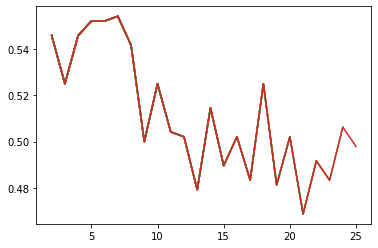

In [175]:
score_list = []
k_list = []
for results in range(2,26):
    k_list.append(results)
    cv_results = cross_validate(KNeighborsClassifier(n_neighbors=results), X_rescaled, y_train, cv = 5)
    mean_score = np.mean(cv_results['test_score'])
    score_list.append(mean_score)
    plt.plot(k_list, score_list)

In [190]:
# hypertuning for KNN
knn_clf = KNeighborsClassifier(n_neighbors=7)
knn_clf.fit(X_rescaled, y_train)
# knn_clf.score(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [203]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,30))
n_neighbors = list(range(1,10))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
